<a href="https://colab.research.google.com/github/mallenarenas/Inferencia-Estadistica/blob/main/pruebas_bda_y_tdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t, chi2, f, binom, poisson, geom
import math
import statistics as stat
import matplotlib.pyplot as plt

<h1> Ejemplo prueba chi-cuadrado</h1>

En un análisis de mercado que elaboró una empresa de marketing durante el año pasado se estabilizaron las participaciones del mercado con un 30% para la compañía A, 50% para la compañía B y 20% para la compañía C. La compañía C incorporará un nuevo producto al mercado y le pidió a la misma empresa si el nuevo producto causará una alteración en las participaciones de los tres competidores en el mercado.

$H_0: p_1 =0,3 \; p_2 =0,5 \; p_3 =0,2$

$H_a:$ Hay por lo menos una proporción que no es la que se indica.

Supongamos que la empresa investigadora usó una muestra de 200 clientes para el estudio. A cada persona se le pidió su preferencia de compra entre las tres alternativas: El producto de la compañía A, el de la B o el nuevo producto de la C. Las respuestas se resumen en el vector O (observaciones):

<h2>Desarrollo: </h2>

In [ ]:
O = [48, 98, 54] # Frecuencias observadas

In [ ]:
p1,p2,p3 = 0.3,0.5,0.2 # Probabilidades
E = [p1*200,p2*200,p3*200] # Frecuencias esperadas
E

[60.0, 100.0, 40.0]

In [ ]:
factor_a_sumar = []
for i in range(0,len(O)):
  factor_a_sumar.append((O[i]-E[i])**2/E[i]) # agrega elementos a la lista
  print(factor_a_sumar)
estadistico_prueba = sum((factor_a_sumar))
print(f"Estadístico de prueba: {estadistico_prueba}")

[2.4]
[2.4, 0.04]
[2.4, 0.04, 4.9]
Estadístico de prueba: 7.34


In [ ]:
alpha = 0.05
valor_critico = chi2.ppf(1-alpha,len(O)-1)
valor_critico

5.991464547107979

In [ ]:
# Tomar una decisión
if estadistico_prueba > valor_critico:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Rechazamos la hipótesis nula


Luego se concluye que, con una confianza del 95%, la introducción del nuevo producto de la compañía C si alterará la estructura actual de participación en el mercado.

In [ ]:
valor_p = 1 - chi2.cdf(estadistico_prueba,len(O)-1)
print(f"Valor P: {valor_p}")

Valor P: 0.02547646994668107


Existe evidencia furte para afirmar que la introducción del nuevo producto de la compañía C si alterará la estructura actual de participación en el mercado.

En python existen diversos paquetes para aplicar pruebas de hipótesis, por ejemplo:

In [ ]:
from scipy.stats import chisquare

x2, p = chisquare(O, f_exp=E)

print("Estadístico de chi-cuadrado:", x2)
print("Valor p:", p)

Estadístico de chi-cuadrado: 7.34
Valor p: 0.02547646994668102


<h1> Ejemplo prueba de homogeneidad </h2>

En un ensayo clínico se desean comparar cuatro vacunas, B1, B2, B3 y B4; en relación al criterio reacción cutánea, con tres niveles, A1 =reacción nula; A2 =reacción moderada; y A3 =reacción importante. Se dividió un grupo de 400 niños en cuatro grupos de 100, a los que se administró las vacunas B1, B2, B3 y B4 ; respectivamente. Los resultados obtenidos conforman la siguiente tabla de contingencia con 4 filas y 3 columnas:

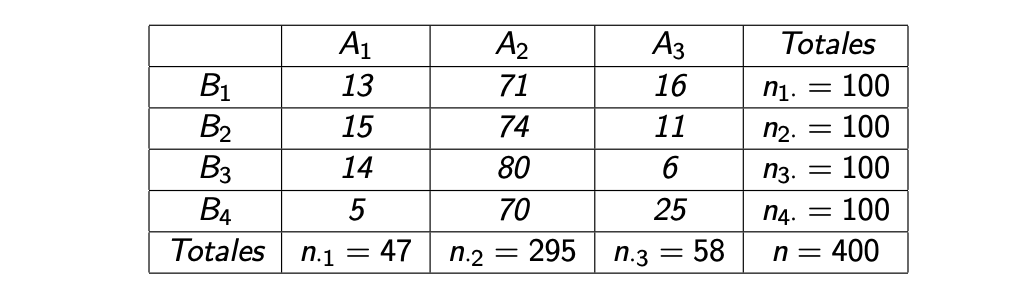

Su hipótesis nula es que, respecto a cualquiera de los tres tipos de reacción, las 4 vacunas son similares.

$H_0 : p_{ij} = p_{kj} = p_{.j}$, para $\;j = 1,2,3,i,\;k = 1,2,3,4$

$H_1 :$ al menos una igualdad no se cumple.

<h2> Desarrollo: </h2>

In [ ]:
O = np.array([[13,71,16],[15,74,11],[14,80,6],[5,70,25]])
O

array([[13, 71, 16],
       [15, 74, 11],
       [14, 80,  6],
       [ 5, 70, 25]])

In [ ]:
O.shape

(4, 3)

In [ ]:
E = np.array([[100*47/400, 100*295/400, 100*58/400], [100*47/400, 100*295/400, 100*58/400], [100*47/400, 100*295/400, 100*58/400], [100*47/400, 100*295/400, 100*58/400]])
E

array([[11.75, 73.75, 14.5 ],
       [11.75, 73.75, 14.5 ],
       [11.75, 73.75, 14.5 ],
       [11.75, 73.75, 14.5 ]])

In [ ]:
factor_a_sumar = []
for i in range(0,O.shape[0]):
  for j in range(0,O.shape[1]):
    factor_a_sumar.append((O[i,j]-E[i,j])**2/E[i,j])
print(factor_a_sumar)
estadistico_prueba = sum(factor_a_sumar)
estadistico_prueba

[0.13297872340425532, 0.10254237288135593, 0.15517241379310345, 0.898936170212766, 0.000847457627118644, 0.8448275862068966, 0.4308510638297872, 0.5296610169491526, 4.982758620689655, 3.877659574468085, 0.1906779661016949, 7.603448275862069]


19.75036124202594

In [ ]:
nu = (4-1)*(3-1)
alpha = 0.05
valor_critico = chi2.ppf(1-alpha,nu)
valor_critico

12.591587243743977

In [ ]:
valor_p = 1 - chi2.cdf(estadistico_prueba,nu)
print(f"Valor P: {valor_p}")

Valor P: 0.0030673486751091605


Hay evidencia muy fuerte para decir que las 4 vacunas se comportan de forma diferente, con respecto a la alergia que producen.

<h1> Ejemplo prueba de independencia </h2>

Suponga que se ha tomado una muestra de 150 personas bebedoras de cerveza. Después de probar cada una de las distintas cervezas se les pregunta su preferencia o primera alternativa. La tabla siguiente resume las respuestas observadas:

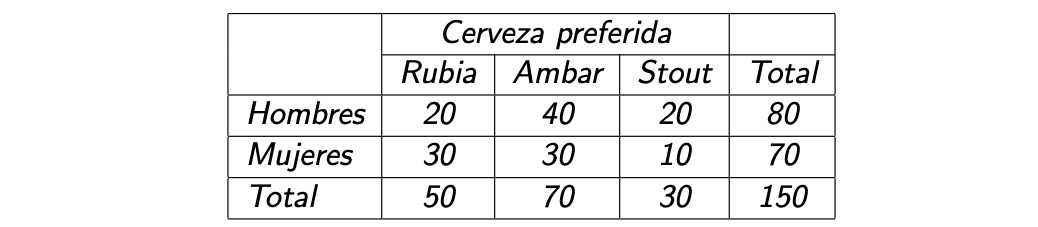

¿Existe evidencia para afirmar que la eleccion del tipo de cerveza es independiente de si la persona es hombre o mujer? Calcular el valor p.

<h2>Desarrollo: </h2>

In [ ]:
O_hombres = [20,40,20]
O_mujeres = [30,30,10]
total = []
for i in range(0,len(O_hombres)):
  total.append(O_hombres[i]+O_mujeres[i])
total


[50, 70, 30]

In [ ]:
n_h = sum(O_hombres)
n_m = sum(O_mujeres)
n = n_h + n_m
n

150

In [ ]:
E_hombres = []
for i in range(0,len(O_hombres)):
    E_hombres.append(n_h*total[i]/n)
E_hombres

[26.666666666666668, 37.333333333333336, 16.0]

In [ ]:
E_mujeres = []
for i in range(0,len(O_mujeres)):
    E_mujeres.append(n_m*total[i]/n)
E_mujeres

[23.333333333333332, 32.666666666666664, 14.0]

In [ ]:
factor_sumar_h = []
for i in range(0,len(O_hombres)):
  factor_sumar_h.append((O_hombres[i]-E_hombres[i])**2/E_hombres[i])
factor_sumar_h

[1.666666666666667, 0.19047619047619013, 1.0]

In [ ]:
factor_sumar_m = []
for i in range(0,len(O_mujeres)):
  factor_sumar_m.append((O_mujeres[i]-E_mujeres[i])**2/E_mujeres[i])
factor_sumar_m

[1.9047619047619053, 0.2176870748299316, 1.1428571428571428]

In [ ]:
estadistico_prueba = sum(factor_sumar_h) + sum(factor_sumar_m)
estadistico_prueba

6.122448979591837

In [ ]:
valor_p = 1- chi2.cdf(estadistico_prueba,2)
print(f"Valor P: {valor_p}")

Valor P: 0.04683031685241956


<h1>Ejemplo 1 de bondad de ajuste</h1>

Hay 1000 bolsas de naranjas, cada una de las cuales contienen 10 naranjas. Alguna de las naranjas están podridas. ¿Es la distribución de probabilidades del número de naranjas podridas por bolsa una Binomial(10,p)?. Los resultados obtenidos tras analizar las 1000 bolsas son los siguientes:

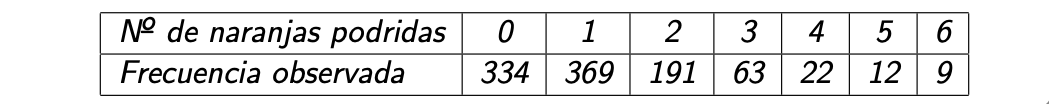

$H_0:$ El número de naranjas podridas por bolsa sigue una distribución Binomial(10,p) para algún p.

$H_1:$ El número de naranjas podridas por bolsa no sigue una distribución Binomial (10,p).

In [ ]:
O = [334,369,191,63,22,12,9]

In [ ]:
datos = pd.DataFrame(O+[0],columns = ["frecuencia observada"], index = ["0","1","2","3","4","5","6","7 o más"])
datos

In [ ]:
numero_podridas = []
for i in range(0,len(O)):
  numero_podridas.append(i*O[i])
total_podridas = sum(numero_podridas)
total_podridas

In [ ]:
p=1142/10000
p

In [ ]:
binom.pmf(2,10,p)

In [ ]:
probabilidades = []
for i in range(0,len(O)):
  probabilidades.append(binom.pmf(i,10,p))
probabilidades


In [ ]:
prob = sum(probabilidades)
prob

In [ ]:
probabilidades.append(1-prob)
probabilidades

In [ ]:
datos["Probabilidades"] = probabilidades
datos

In [ ]:
E =[]
for i in range(0,len(probabilidades)):
  E.append(probabilidades[i]*1000)
E

In [ ]:
datos["Frecuencias esperadas"] = E
datos

In [ ]:
E[7]+E[6]+E[5]+E[4]

In [ ]:
O_nuevo = O[0:4]
O_nuevo.append(22+12+9)
O_nuevo

In [ ]:
datos_nuevo = pd.DataFrame(O_nuevo,columns = ["frecuencia observada"], index = ["0","1","2","3","4 o más"])
datos_nuevo

In [ ]:
probabilidades_nuevo = probabilidades[0:4]
probabilidades_nuevo.append(sum(probabilidades[4:len(probabilidades)]))
probabilidades_nuevo

In [ ]:
datos_nuevo["Probabilidades"] = probabilidades_nuevo
datos_nuevo

In [ ]:
E_nuevo = E[0:4]
E_nuevo.append(probabilidades_nuevo[4]*1000)
E_nuevo

In [ ]:
datos_nuevo["Frecuencias esperadas"] = E_nuevo
datos_nuevo

In [ ]:
factor_sumar = []
for i in range(0,len(O_nuevo)):
  factor_sumar.append((O_nuevo[i]-E_nuevo[i])**2/E_nuevo[i])
factor_sumar


In [ ]:
estadistico_prueba = sum(factor_sumar)
estadistico_prueba

In [ ]:
alpha = 0.05
k = 5
valor_critico = chi2.ppf(1-alpha,k-1)
valor_critico

<h1>Ejemplo 2 de bondad de ajuste</h1>

Un entomólogo está analizando la distribución de una especie de insecto en una zona de cultivo. Para dicho estudio seleccionaron 40 parcelas de
2m x 2m y contabilizó el número de insectos de dicha especie en cada una. Los resultados son los siguientes:

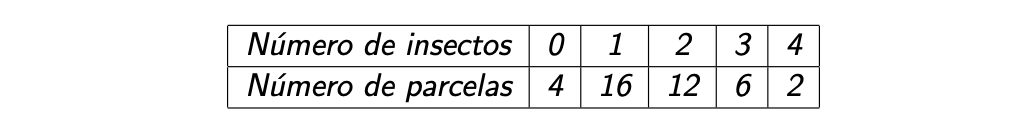

Pruebe con $\alpha = 0.05$ si los datos se ajustan a una distribución de Poisson.

<h1>Función de Masa (pmf), función de distribución acumulada (cdf) y función de puntuación percentil (ppf)</h1>
<h2>1- Binomial</h2>

In [ ]:
k,n,p = 0,10,0.1142
binom.pmf(k,n,p)

In [ ]:


x = np.arange(0, n+1)
print(x, type(x))

# Probabilidades asociadas a cada número de éxitos
probabilidades = binom.pmf(x, n, p)

# Gráfica de barras para la distribución binomial
plt.bar(x, probabilidades, color="purple")
plt.xticks(x)
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial (n={}, p={})'.format(n, p))
plt.show()

In [ ]:
binom.cdf(1,n,p)

In [ ]:
binom.ppf(0.68,n,p)

<h2>2- Poisson</h2>

In [ ]:
k,lmbda = 0,5
poisson.pmf(k,lmbda)

In [ ]:
x = np.arange(0, 20)

# Probabilidades asociadas a cada número de éxitos
probabilidades = poisson.pmf(x,lmbda)

# Gráfica de barras para la distribución binomial
plt.bar(x, probabilidades, color="green")
plt.xticks(x)
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.title('Distribución Poisson (lambda={})'.format(lmbda))
plt.show()

<h2>3- Geométrica</h2>


In [ ]:
k,p= 2,0.5
geom.pmf(k,p)

In [ ]:
x = np.arange(1, 20)

# Probabilidades asociadas a cada número de éxitos
probabilidades = geom.pmf(x,p)

# Gráfica de barras para la distribución binomial
plt.bar(x, probabilidades, color="green")
plt.xticks(x)
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.title('Distribución Geométrica (p={})'.format(p))
plt.show()

<h1>Función de Densidad (pdf), función de distribución acumulada (cdf) y función de puntuación percentil (ppf)</h1>
<h2>1- Normal</h2>

In [ ]:
norm.pdf(2,0,1)

In [ ]:
mu = 0
sigma = 1

x = np.arange(-5, 5, 0.05)
y = norm.pdf(x, loc = mu, scale = sigma)
y1 = norm.pdf(x, loc = mu1, scale = sigma1)
plt.plot(x, y, color="green", linewidth=2, label='mu = {}, sd = {}'.format(mu,sigma))
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('Distribución Normal (mu={}, sd={})'.format(mu,sigma))
plt.show()